## **The XX Company - Technical Case**
By: Maria Inês Arruda Gonçalves

\

This notebook is a part of the technical test for the Junior Data Analyst Role.

The aim of this notebook is to make an Exploratory Data Analysis (EDA) of the metrics provided by The XX Company. Here I have to analyze the data available and write my insights about the behavior of:

● Volume (impressions, clicks, overall website traffic…)\
● CPC: Cost per click\
● Total number of conversions\
● XX’s share of the website\
● Overall traffic of the advertiser

## There are also some questions that need to be answered:

1) Is it possible to see any kind of seasonality? Did the values increase or decrease? By how much?

2) Are XX’s results and delivery stable?

### Let's begin importing the libraries

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

### Data Fetching


In [2]:
#Loading the dataset
df_blank = pd.read_excel("/content/drive/MyDrive/The_XX_Company/xx_data_analyst_data_blank.xlsx")

### The original data came with missing values of:

● CTR: click-through rate\
● CPC: cost per click\
● CR: conversion rate\
● ROAS: return on advertising spend\
● Share: percentage of how many conversions are from XX

In [3]:
#Verifying the first 5 rows
df_blank.head()

,Date (UTC),Imps,Clicks,CTR,Cost (BRL),CPC,XX Conversions,CR,ROAS,The XX Conversions value (BRL),Total number of conversions,Share,Total number of tags
0,2018-11-30,1399236,11315,NaN,10805.77000,NaN,651,NaN,NaN,96670.08,20879,NaN,4718136
1,2018-11-29,6061558,41572,NaN,53478.21298,NaN,1511,NaN,NaN,206342.85,28435,NaN,6282008
2,2018-11-28,6415389,41490,NaN,57525.13985,NaN,1346,NaN,NaN,180409.58,30944,NaN,7259793
3,2018-11-27,6613383,44107,NaN,71001.39354,NaN,1560,NaN,NaN,204868.43,33573,NaN,7859916
4,2018-11-26,4885912,32586,NaN,49225.12170,NaN,1127,NaN,NaN,141374.24,32647,NaN,8336409


In [4]:
#Loading the dataset
df = pd.read_excel("/content/drive/MyDrive/The_XX_Company/xx_data_analyst_data.xlsx")

## To fill out these columns I had to perform some calculations on the excel file:

● CTR: click-through rate: Is the proportion of people who clicked by the people that saw a propaganda.

CTR = $\frac{\text{Clicks}}{\text{Imps}}$

● CPC: cost per click: Is the cost of each click\

CPC = $\frac{\text{Cost (BRL)}}{\text{Clicks}}$

● CR: conversion rate: Is the proportion of conversions from XX by the amount of Clicks

CR = $\frac{\text{XX}{\space}{\space} \text{Conversions}}{\text{Clicks}}$

● ROAS: Return on the amount spent on advertising

ROAS = $\frac{\text{XX}{\space}{\space} \text{Conversions}{\space}{\space} \text{value (BRL)}}{\text{Cost (BRL)}}$

● Share: percentage of how many conversions are from XX

Share = $\frac{\text{XX Conversions}}{\text{Total number of conversions}}$

### Now let's check the full dataset after filling the blank spaces.

In [5]:
#Verifying the first 5 rows
df.head()

,Date (UTC),Imps,Clicks,CTR: click-through rate,Cost (BRL),CPC: Cost per click,XX Conversions,CR: Conversion Rate,ROAS,The XX Conversions value (BRL),Total number of conversions,Share,Total number of tags
0,2018-11-30,1399236,11315,0.008087,10805.77000,0.954995,651,0.057534,8.946154,96670.08,20879,0.031180,4718136
1,2018-11-29,6061558,41572,0.006858,53478.21298,1.286400,1511,0.036347,3.858447,206342.85,28435,0.053139,6282008
2,2018-11-28,6415389,41490,0.006467,57525.13985,1.386482,1346,0.032442,3.136187,180409.58,30944,0.043498,7259793
3,2018-11-27,6613383,44107,0.006669,71001.39354,1.609753,1560,0.035369,2.885414,204868.43,33573,0.046466,7859916
4,2018-11-26,4885912,32586,0.006669,49225.12170,1.510622,1127,0.034585,2.871994,141374.24,32647,0.034521,8336409


In [6]:
#Verifying if the dataset is complete
df.shape

(30, 13)

### It's important to verify the type of the columns to see if they are in the proper format.

In [7]:
#Verifying the types of each column
df.dtypes

Date (UTC)                         object
Imps                                int64
Clicks                              int64
CTR: click-through rate           float64
Cost (BRL)                        float64
CPC: Cost per click               float64
XX Conversions                      int64
CR: Conversion Rate               float64
ROAS                              float64
The XX Conversions value (BRL)    float64
Total number of conversions         int64
Share                             float64
Total number of tags                int64
dtype: object

### The 'Date (UTC)' column is not in the datetime format. So let's transform it to the correct format.


In [8]:
#Transforming 'Date (UTC)' to date_time
df['Date (UTC)'] = pd.to_datetime(df['Date (UTC)'])

### Let's see if it worked out

In [9]:
#Verifying the datatypes once again
df.dtypes

Date (UTC)                        datetime64[ns]
Imps                                       int64
Clicks                                     int64
CTR: click-through rate                  float64
Cost (BRL)                               float64
CPC: Cost per click                      float64
XX Conversions                             int64
CR: Conversion Rate                      float64
ROAS                                     float64
The XX Conversions value (BRL)           float64
Total number of conversions                int64
Share                                    float64
Total number of tags                       int64
dtype: object

### Taking a quick look into statistical metrics

In [10]:
#Checking the statistics
df.describe()

,Imps,Clicks,CTR: click-through rate,Cost (BRL),CPC: Cost per click,XX Conversions,CR: Conversion Rate,ROAS,The XX Conversions value (BRL),Total number of conversions,Share,Total number of tags
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,2.511317e+06,18903.966667,0.008184,24696.328080,1.124707,575.966667,0.026943,3.944591,84195.243333,17442.466667,0.031970,4.871627e+06
std,1.917896e+06,11951.290888,0.001335,23416.145760,0.439173,506.117370,0.010594,1.140557,67153.685562,14581.415278,0.009028,2.595668e+06
min,8.246140e+05,6677.000000,0.006424,5652.772480,0.676086,116.000000,0.011592,2.842497,22902.010000,3946.000000,0.014662,2.541764e+06
25%,1.113674e+06,9829.000000,0.007325,8364.084575,0.797263,181.250000,0.018884,3.156602,33722.222500,7003.250000,0.026786,3.155559e+06
50%,1.486341e+06,13059.500000,0.008023,11685.376660,1.018252,324.500000,0.024212,3.859508,53821.435000,11534.500000,0.030288,3.801807e+06
75%,3.757558e+06,26978.000000,0.008494,42548.295480,1.276914,919.250000,0.034049,4.366590,123343.302500,26546.000000,0.037390,5.975624e+06
max,6.613383e+06,44107.000000,0.011490,84763.780030,2.312854,1715.000000,0.057534,8.946154,257715.640000,59990.000000,0.053139,1.277168e+07


# Exploratory Data Analysis (EDA)

### One of the best ways to analyze the correlations between features is through a correlation heatmap. So let's do it.

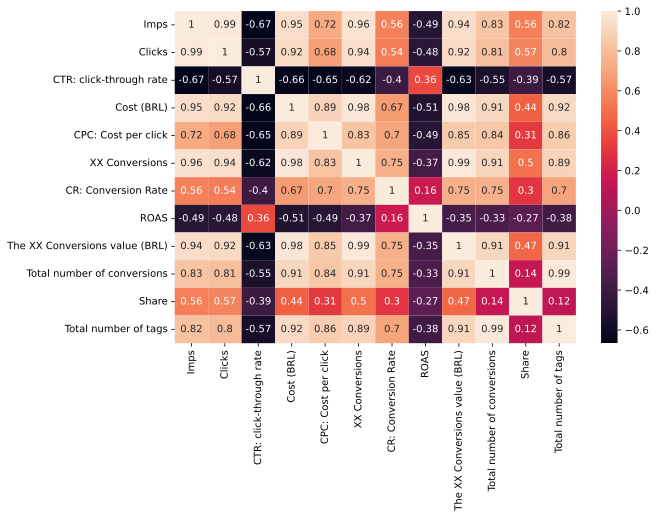

In [11]:
#Correlation heatmap
plt.figure(figsize = (9,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

### We can see many features have a strong correlation between them. That's very reasonable, as we see that many features are dependent on some parameters, as shown in the calculations performed to fill the blank spaces in the excel file.

### As we're going to use many of the columns from now on, let's show all the column names.

In [12]:
#Columns names
df.columns

Index(['Date (UTC)', 'Imps', 'Clicks', 'CTR: click-through rate', 'Cost (BRL)',
       'CPC: Cost per click', 'XX Conversions', 'CR: Conversion Rate', 'ROAS',
       'The XX Conversions value (BRL)', 'Total number of conversions',
       'Share', 'Total number of tags'],
      dtype='object')

### One of the first analyses we can do is identify the behavior of the metrics depending on the day of the week.

### To do this, we can create a new column on the dataframe called 'Day of the Week'.

### To identify the day of the week through the date, we can use the command 'dt.dayofweek'. Then, we can make a dictionary to write the day of the week on the column.


In [13]:
#Creating the 'Day of the Week' column
df['Day of the Week']=df['Date (UTC)'].dt.dayofweek.map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

df.head()

,Date (UTC),Imps,Clicks,CTR: click-through rate,Cost (BRL),CPC: Cost per click,XX Conversions,CR: Conversion Rate,ROAS,The XX Conversions value (BRL),Total number of conversions,Share,Total number of tags,Day of the Week
0,2018-11-30,1399236,11315,0.008087,10805.77000,0.954995,651,0.057534,8.946154,96670.08,20879,0.031180,4718136,Friday
1,2018-11-29,6061558,41572,0.006858,53478.21298,1.286400,1511,0.036347,3.858447,206342.85,28435,0.053139,6282008,Thursday
2,2018-11-28,6415389,41490,0.006467,57525.13985,1.386482,1346,0.032442,3.136187,180409.58,30944,0.043498,7259793,Wednesday
3,2018-11-27,6613383,44107,0.006669,71001.39354,1.609753,1560,0.035369,2.885414,204868.43,33573,0.046466,7859916,Tuesday
4,2018-11-26,4885912,32586,0.006669,49225.12170,1.510622,1127,0.034585,2.871994,141374.24,32647,0.034521,8336409,Monday


### Let's analyze the days of the week which we have more 'Impressions' and 'Clicks'


In [14]:
#Impressions by day of the week
impressions_day_week = df.groupby('Day of the Week')['Imps'].sum()
impressions_day_week_sorted = impressions_day_week.sort_values(ascending=False)
impressions_day_week_sorted

Day of the Week
Friday       15481774
Thursday     13386924
Saturday     11490168
Tuesday       9913273
Wednesday     9607489
Monday        8562609
Sunday        6897259
Name: Imps, dtype: int64

### We can transform the data above into a bar plot to have a better understanding

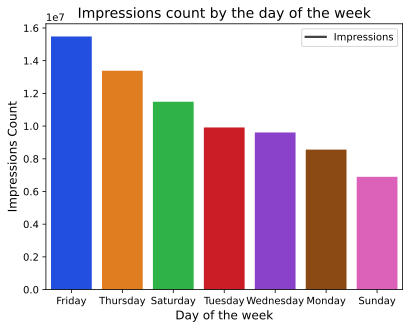

In [15]:
#Impressions by day of the week
sns.barplot(x=impressions_day_week_sorted.index, y=impressions_day_week_sorted.values, palette='bright')
plt.title('Impressions count by the day of the week', fontsize=14)
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Impressions Count', fontsize=12)
plt.legend(['Impressions'])
plt.show()

### We can perform the same analysis to Clicks

In [16]:
#Clicks by day of the week
clicks_day_week = df.groupby('Day of the Week')['Clicks'].sum()
clicks_day_week_sorted = clicks_day_week.sort_values(ascending=False)
clicks_day_week_sorted

Day of the Week
Friday       117705
Thursday     103094
Saturday      89775
Tuesday       70219
Wednesday     66908
Monday        63337
Sunday        56081
Name: Clicks, dtype: int64

### Putting into a bar plot

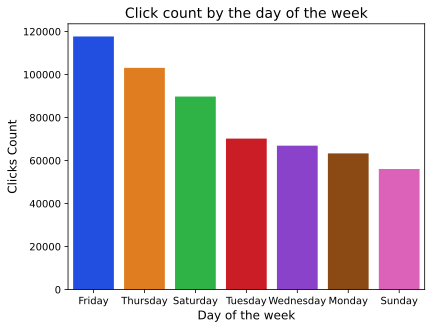

In [17]:
#Clicks by day of the week
sns.barplot(x=clicks_day_week_sorted.index, y=clicks_day_week_sorted.values, palette='bright')
plt.title('Click count by the day of the week', fontsize=14)
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Clicks Count', fontsize=12)
plt.show()

## Through the plots above we can identify from Thursday to Saturday we have more impressions and clicks.

### On the heatmap we saw a very strong correlation between Impressions and Clicks, and the barplots above confirmed this.

### We can also plot them through the whole period, to see how they look. In other words, the impressions and clicks throughout the days of November.


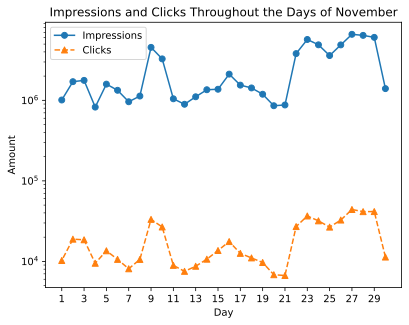

In [18]:
#Plot of Impressions and Clicks Throughout the Days of November
plt.plot(df['Date (UTC)'].dt.day, df['Imps'], marker='o', label='dados')
plt.plot(df['Date (UTC)'].dt.day, df['Clicks'], linestyle ='--', marker='^', label='dados')
plt.xticks(np.arange(1,31,2))
plt.yscale('log')
plt.title('Impressions and Clicks Throughout the Days of November')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.legend(["Impressions" , "Clicks"])
plt.show()

### We see they have the same behavior.

## We can also see a very interesting pattern by the end of november. Let's analyze this carefully!



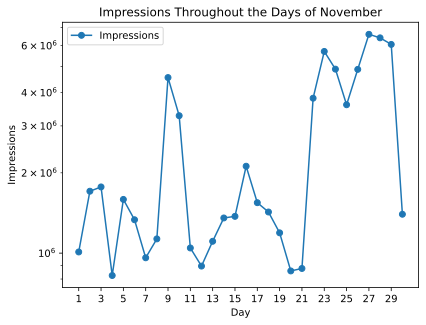

In [19]:
#Plot of Impressions  Throughout the Days of November
plt.plot(df['Date (UTC)'].dt.day, df['Imps'], marker='o', label='dados')
plt.xticks(np.arange(1,31,2))
plt.yscale('log')
plt.title('Impressions Throughout the Days of November')
plt.xlabel('Day')
plt.ylabel('Impressions')
plt.legend(["Impressions"])
plt.show()

### From November 22nd to November 29th, we have a great peak!

### This most likely happened because of **BLACK FRIDAY**, on November 23rd, 2018.

### The Monday after Black Friday, we also have Cyber Monday.

### Let's remake this same plot, but adding a vertical line to **'Black Friday'** and **'Cyber Monday'**.

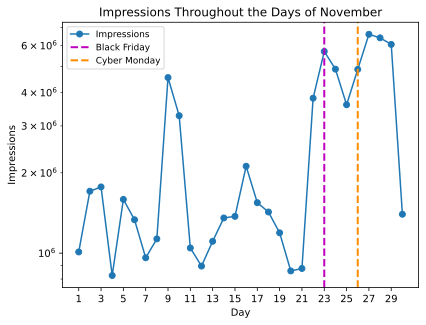

In [20]:
# Plot of Impressions Throughout the Days of November

plt.plot(df['Date (UTC)'].dt.day, df['Imps'], marker='o', label='dados')
plt.xticks(np.arange(1,31,2))
plt.axvline(x = 23, color = 'm', label = 'axvline - full height', linestyle = '--', linewidth = 2)
plt.axvline(x = 26, color = 'darkorange', label = 'axvline - full height', linestyle = '--', linewidth = 2)
plt.yscale('log')
plt.title('Impressions Throughout the Days of November')
plt.xlabel('Day')
plt.ylabel('Impressions')
plt.legend(["Impressions" , "Black Friday", "Cyber Monday"], fontsize=9)
plt.grid(False)
plt.show()

### We can notice that Black Friday had a great impact!

### Now let's analyze the Click-Through Rate (CTR). We can have a better visualization of the CTR if we make a bar plot comparing the amount of impressions and the amount of clicks throughout the days of November.

Text(0, 0.5, 'Frequency')

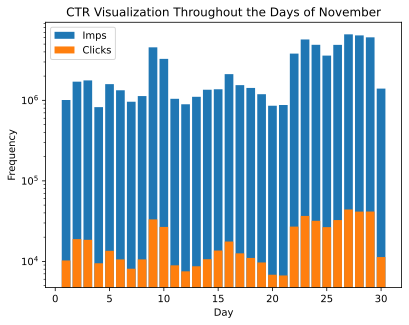

In [21]:
#Barplot comparing Impressions and Clicks Throughout the Days of November

plt.bar(df['Date (UTC)'].dt.day, df['Imps'])
plt.bar(df['Date (UTC)'].dt.day, df['Clicks'])
plt.legend(["Imps" , "Clicks"])
plt.yscale('log')
plt.title('CTR Visualization Throughout the Days of November')
plt.xlabel('Day')
plt.ylabel('Frequency')

### We can also analyze only the percentage of click-through rate by date throughout the days of November

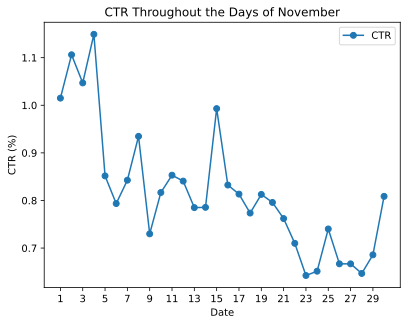

In [22]:
#Plot of the percentage of click-through rate by date throughout the Days of November
plt.plot(df['Date (UTC)'].dt.day, df['CTR: click-through rate']*100, marker='o', label='dados')
plt.xticks(np.arange(1,31,2))
plt.title('CTR Throughout the Days of November')
plt.xlabel('Date')
plt.ylabel('CTR (%)')
plt.legend(["CTR"])
plt.show()

### Another great metric is to analyze the importance of hiring the The XX Company.

### One way to see this is to analyze the XX Conversions value compared to the costs. Let's do it!

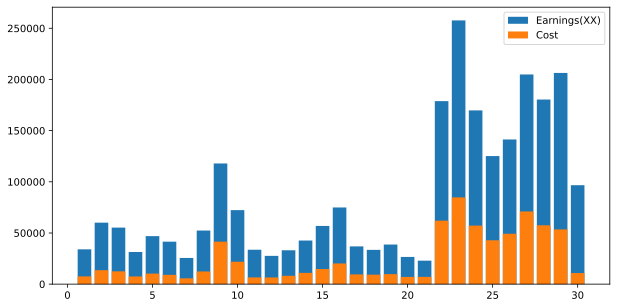

In [23]:
#Plot comparing "Cost (BRL)" and "XX Conversions value (BRL)"
fig, ax = plt.subplots(figsize=(10, 5))

plt.bar(df['Date (UTC)'].dt.day, df['The XX Conversions value (BRL)'])
plt.bar(df['Date (UTC)'].dt.day,df['Cost (BRL)'])
plt.legend(["Earnings(XX)" , "Cost"])
plt.show()

### Above we also have a good idea of ​​why it is worth it investing with The XX Company.

### The gains promoted due to XX Company far exceed the costs and thus generate an excellent profit margin.

### We can improve the plot above by adding the ROAS and remaking this comparison

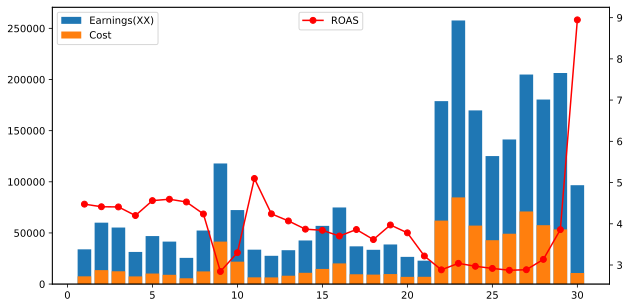

In [24]:
#Plot comparing "Cost (BRL)",  "XX Conversions value (BRL) and ROAS"

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df['Date (UTC)'].dt.day, df['The XX Conversions value (BRL)'])
ax.bar(df['Date (UTC)'].dt.day,df['Cost (BRL)'])
ax.legend(["Earnings(XX)" , "Cost"], loc=2)

ax2=ax.twinx()

ax2.plot(df['Date (UTC)'].dt.day, df['ROAS'], color ='r', marker ='o')
ax2.legend(["ROAS"], loc=9)

### We are also going to analyze the ROAS by the day of the week through a Boxplot

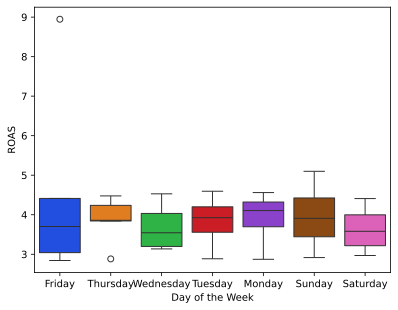

In [25]:
sns.boxplot(x=df['Day of the Week'], y=df['ROAS'], data=df, palette='bright')
plt.show()

### We can see that Monday and Sunday are the days where we have a greater dispersion, and they’re also the worst days when it comes to clicks and impressions.

### An interesting point is that the outlier on the ROAS doesn't happened on the Black Friday, it happened on November 30th.

### Looking into the data, this might have happened because on Black Friday it's when we spend the most with advertisements. Even though we had a great earning, the biggest ROAS actually happened on November 30th. That was the day where we got the higher return compared to the amount spent.


## Conclusions

### After the analysis above we're now ready to answer the questions:

**1) Is it possible to see any kind of seasonality? Did the values increase or decrease? By how much?**

**2)Are XX’s results and delivery stable?**

### Answers:

### **1)** We can notice some kind of seasonality when it comes  to impressions and clicks. Through the plots above we can identify that Friday, Saturday and Thursday are the days when there are most impressions and clicks. This may be due to getting closer to the weekend and also because we had a Black Friday event this month.

### **2)** When it comes to the results and delivery of XX we can see very clearly through the last graph that the gains promoted due to XX far exceed the costs of propaganda and thus generate an excellent profit margin and good ROAS values.

In [26]:
%%capture
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/drive/MyDrive/The_XX_Company/XXCompany_Technical_Test.ipynb
